In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import time
import torch
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss

In [10]:
# Train data
data = pd.read_csv('C:/Users/susum/Documents/year5_sem1/QBUS3820/Group_Assignment/final_version/data_train.csv')
pd.set_option('display.max_columns', len(data.columns))
data.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,price,flexible,moderate,Ashfield,Auburn,Bankstown,Blacktown,Botany_Bay,Burwood,Camden,Campbelltown,Canada_Bay,Canterbury,City_Of_Kogarah,Fairfield,Holroyd,Hornsby,Hunters_Hill,Hurstville,Ku_Ring_Gai,Lane_Cove,Leichhardt,Liverpool,Manly,Marrickville,Mosman,North_Sydney,Parramatta,Penrith,Pittwater,Randwick,Rockdale,Ryde,Strathfield,Sutherland_Shire,Sydney,The_Hills_Shire,Warringah,Waverley,Willoughby,Woollahra,Aparthotel,Apartment,Bed_and_breakfast,Boat,Boutique_hotel,Bungalow,Cabin,Camper_RV,Condominium,Cottage,Earth_house,Farm_stay,Guest_suite,Guesthouse,Hostel,Hotel,House,Island,Loft,Other,Serviced_apartment,Tiny_house,Townhouse,Villa,Yurt,Entire_home_apt,Hotel_room,Private_room,Shared_room,Couch,Futon,Pull_out_Sofa,Real_Bed,Missing,a_few_days_or_more,within_a_day,within_a_few_hours,within_an_hour,sent_id_dummy,sesame_dummy,sesame_offline_dummy,weibo_dummy,kba_dummy,zhima_selfie_dummy,manual_online_dummy,manual_offline_dummy,google_dummy,work_email_dummy,facebook_dummy,identity_manual_dummy,selfie_dummy,offline_government_id_dummy,jumio_dummy,reviews_dummy,government_id_dummy,email_dummy,phone_dummy,Washer_Dryer_dummy,Breakfast_bar_dummy,Infinity_pool_dummy,Parking_dummy,Projector_and_screen_dummy,Bidet_dummy,Shared_gym_dummy,Touchless_faucets_dummy,Pool_cover_dummy,Garage_parking_dummy,Private_gym_dummy,Bathtub_with_bath_chair_dummy,Brick_oven_dummy,Gated_property_dummy,Propane_barbeque_dummy,Apple_TV_dummy,Security_system_dummy,Warming_drawer_dummy,Stand_alone_steam_shower_dummy,Mountain_view_dummy,Ironing_Board_dummy,Ice_Machine_dummy,Gas_fireplace_dummy,Outdoor_kitchen_dummy,Jetted_tub_dummy,Steam_oven_dummy,Tennis_court_dummy,Amazon_Echo_dummy,HBO_GO_dummy,Shared_hot_tub_dummy,Ground_floor_access_dummy,Chef_s_kitchen_dummy,Dining_area_dummy,Fire_pit_dummy,Hammock_dummy,Sauna_dummy,Standing_valet_dummy,Fixed_grab_bars_for_toilet_dummy,Private_hot_tub_dummy,Heat_lamps_dummy,Private_bathroom_dummy,Murphy_bed_dummy,Exercise_equipment_dummy,Pool_toys_dummy,Shower_chair_dummy,Alfresco_bathtub_dummy,High_resolution_computer_monitor_dummy,Wine_cooler_dummy,Ski_in_Ski_out_dummy,Fixed_grab_bars_for_shower_dummy,Shared_pool_dummy,Firm_mattress_dummy,Double_oven_dummy,Private_pool_dummy,Heated_floors_dummy,Printer_dummy,Beach_view_dummy,Central_air_conditioning_dummy,Outdoor_parking_dummy,Day_bed_dummy,Gas_oven_dummy,Memory_foam_mattress_dummy,Mini_fridge_dummy,Sun_loungers_dummy,Wide_clearance_to_shower_dummy,_toilet_dummy,Heated_towel_rack_dummy,Step_free_shower_dummy,Wide_doorway_to_guest_bathroom_dummy,Soaking_tub_dummy,Formal_dining_area_dummy,Accessible_height_toilet_dummy,Table_corner_guards_dummy,Disabled_parking_spot_dummy,Wide_entrance_dummy,Other_pet_s__dummy,Wide_entryway_dummy,EV_charger_dummy,Accessible_height_bed_dummy,Kitchenette_dummy,DVD_player_dummy,Rain_shower_dummy,Terrace_dummy,Ceiling_fan_dummy,Pillow_top_mattress_dummy,Fireplace_guards_dummy,Extra_space_around_bed_dummy,En_suite_bathroom_dummy,Convection_oven_dummy,Sound_system_dummy,Breakfast_table_dummy,Bread_maker_dummy,Baby_monitor_dummy,Balcony_dummy,Doorman_dummy,Outdoor_seating_dummy,Netflix_dummy,Espresso_machine_dummy,Smart_TV_dummy,Walk_in_shower_dummy,Hot_water_kettle_dummy,Lake_access_dummy,Outlet_covers_dummy,Stair_gates_dummy,Wide_hallways_dummy,Wide_entrance_for_guests_dummy,Flat_path_to_guest_entrance_dummy,Smart_lock_dummy,Building_staff_dummy,Barbecue_utensils_dummy,Baking_sheet_dummy,Body_soap_dummy,Bath_towel_dummy,Toilet_paper_dummy,Cat_s__dummy,Bedroom_comforts_dummy,Bathroom_essent

In [11]:
len(data.columns)

332

# Prep data

In [12]:
# Prep data
predictors = list(data.columns)
predictors.remove('price')
response = ['price']

X_train1 = data.loc[:, predictors]
y_train1  = np.log(data.loc[:, response])

# remove non ASCII features 
X_train1.columns = X_train1.columns.str.encode('ascii', 'ignore').str.decode('ascii')
X_train1.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train1.columns]



# OLS

In [13]:
from sklearn.linear_model import LinearRegression
ols1 = LinearRegression()
ols1.fit(X_train1, y_train1)

y_pred_train = ols1.predict(X_train1)

print(f'Train MSE is {(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train RMSE is {np.sqrt(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train r2 is {r2_score(y_train1, y_pred_train)}')

# print(f'\nTest MSE is {(mean_squared_error(y_val1, y_pred))}')
# print(f'Test RMSE is {np.sqrt(mean_squared_error(y_val1, y_pred))}')
# print(f'Test r2 is {r2_score(y_val1, y_pred)}')


Train MSE is 0.1391208713819349
Train RMSE is 0.37298910356997683
Train r2 is 0.7408767066494345


In [14]:
X_train1.columns[90:120]

Index(['Villa', 'Yurt', 'Entire_home_apt', 'Hotel_room', 'Private_room',
       'Shared_room', 'Couch', 'Futon', 'Pull_out_Sofa', 'Real_Bed', 'Missing',
       'a_few_days_or_more', 'within_a_day', 'within_a_few_hours',
       'within_an_hour', 'sent_id_dummy', 'sesame_dummy',
       'sesame_offline_dummy', 'weibo_dummy', 'kba_dummy',
       'zhima_selfie_dummy', 'manual_online_dummy', 'manual_offline_dummy',
       'google_dummy', 'work_email_dummy', 'facebook_dummy',
       'identity_manual_dummy', 'selfie_dummy', 'offline_government_id_dummy',
       'jumio_dummy'],
      dtype='object')

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

col = ['bedrooms', 'Entire_home_apt', 'accommodates','Private_room','cleaning_fee_perc']
X = X_train1[col]
y = y_train1


ols = sm.OLS(y,X).fit()
print (ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.257e+05
Date:                Fri, 29 May 2020   Prob (F-statistic):                        0.00
Time:                        09:19:37   Log-Likelihood:                         -10638.
No. Observations:               10635   AIC:                                  2.129e+04
Df Residuals:                   10630   BIC:                                  2.132e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# GBR

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

time_start = time.time()

gbr = GradientBoostingRegressor(learning_rate= 0.05, max_depth = 4, n_estimators= 1500, subsample = 0.8)
gbr.fit(X_train1, y_train1)

y_pred_train = gbr.predict(X_train1)

time_end = time.time()

print(f'time taken is {time_end - time_start} seconds')

print(f'\nTrain MSE is {(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train RMSE is {np.sqrt(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train r2 is {r2_score(y_train1, y_pred_train)}')

C:\Users\susum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time taken is 73.64000844955444 seconds

Train MSE is 0.03628400561772838
Train RMSE is 0.19048360984013396
Train r2 is 0.9324182565978589


In [17]:
gbr_table = pd.DataFrame(gbr.feature_importances_, columns=['weight'], index=X_train1.columns)
gbr_table.sort_values('weight', ascending=False, inplace=True)
gbr_table.head(10)

,weight
bedrooms,0.301917
accommodates,0.218031
cleaning_fee_perc,0.074188
longitude,0.056001
Entire_home_apt,0.049980
bathrooms,0.039791
Private_room,0.026844
latitude,0.023957
security_deposit_perc,0.020503
availability_90,0.015872


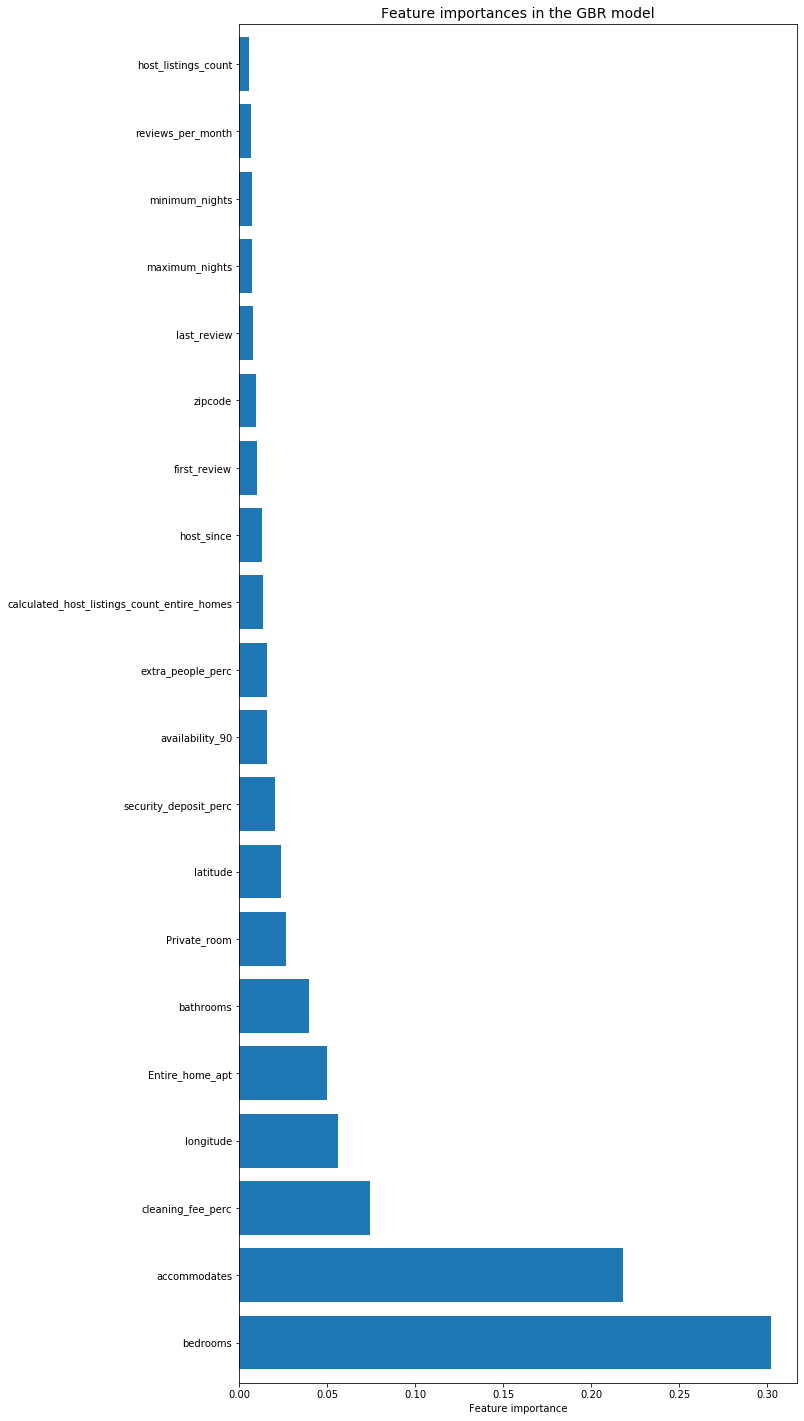

In [36]:
# Plotting feature importances
plt.figure(figsize=(10,25))
plt.barh(gbr_table.index[0:20], gbr_table.weight[0:20], align='center') 
plt.title("Feature importances in the GBR model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# LightGBM

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import lightgbm as lgb

time_start = time.time()

lbst = lgb.LGBMRegressor(objective='regression', subsample = 0.8, num_leaves = 24, 
                                           n_estimators = 500, learning_rate = 0.05)

lbst.fit(X_train1, y_train1)

y_pred_train = lbst.predict(X_train1)

time_end = time.time()

print(f'time taken is {time_end - time_start} seconds')

print(f'\nTrain MSE is {(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train RMSE is {np.sqrt(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train r2 is {r2_score(y_train1, y_pred_train)}')


time taken is 1.0222368240356445 seconds

Train MSE is 0.04978386591978804
Train RMSE is 0.2231229838447578
Train r2 is 0.9072737313623989


In [26]:
lbst_table = pd.DataFrame(lbst.feature_importances_, columns=['weight'], index=X_train1.columns)
lbst_table.sort_values('weight', ascending=False, inplace=True)
lbst_table.head(10)

,weight
cleaning_fee_perc,975
latitude,847
longitude,842
host_since,677
security_deposit_perc,455
first_review,435
zipcode,427
last_review,407
reviews_per_month,389
maximum_nights,382


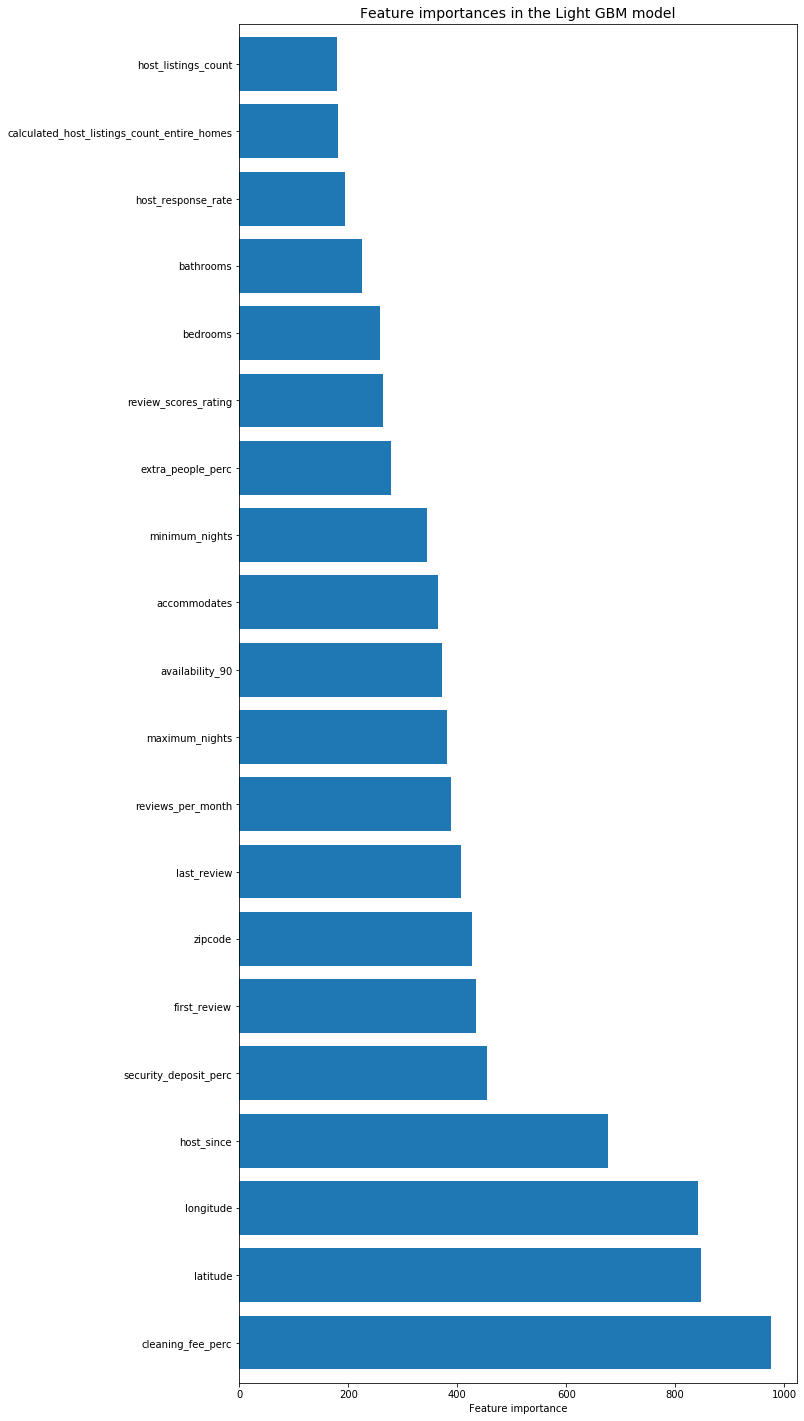

In [27]:
# Plotting feature importances
plt.figure(figsize=(10,25))
plt.barh(lbst_table.index[0:20], lbst_table.weight[0:20], align='center') 
plt.title("Feature importances in the Light GBM model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# XG Boosting

In [37]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.306, subsample = 1.0, n_estimators = 1975, max_depth = 6,
                            learning_rate = 0.05, reg_lambda = 1000)
xgb_reg.fit(X_train1, y_train1)
training_preds_xgb_reg = xgb_reg.predict(X_train1)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")

print(f'\nTrain MSE is {(mean_squared_error(y_train1, training_preds_xgb_reg))}')
print(f'Train RMSE is {np.sqrt(mean_squared_error(y_train1, training_preds_xgb_reg))}')
print(f'Train r2 is {r2_score(y_train1, training_preds_xgb_reg)}')



Time taken to run: 0.4 minutes

Train MSE is 0.0616279273485058
Train RMSE is 0.24824972779140322
Train r2 is 0.8852132585262987


In [38]:
xgb_table = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train1.columns)
xgb_table.sort_values('weight', ascending=False, inplace=True)
xgb_table.head(10)

,weight
Private_room,0.141724
bedrooms,0.116013
accommodates,0.061346
Entire_home_apt,0.053150
bathrooms,0.033358
Futon,0.026697
Hostel,0.022631
cleaning_fee_perc,0.019188
calculated_host_listings_count_entire_homes,0.018696
Hotel,0.013200


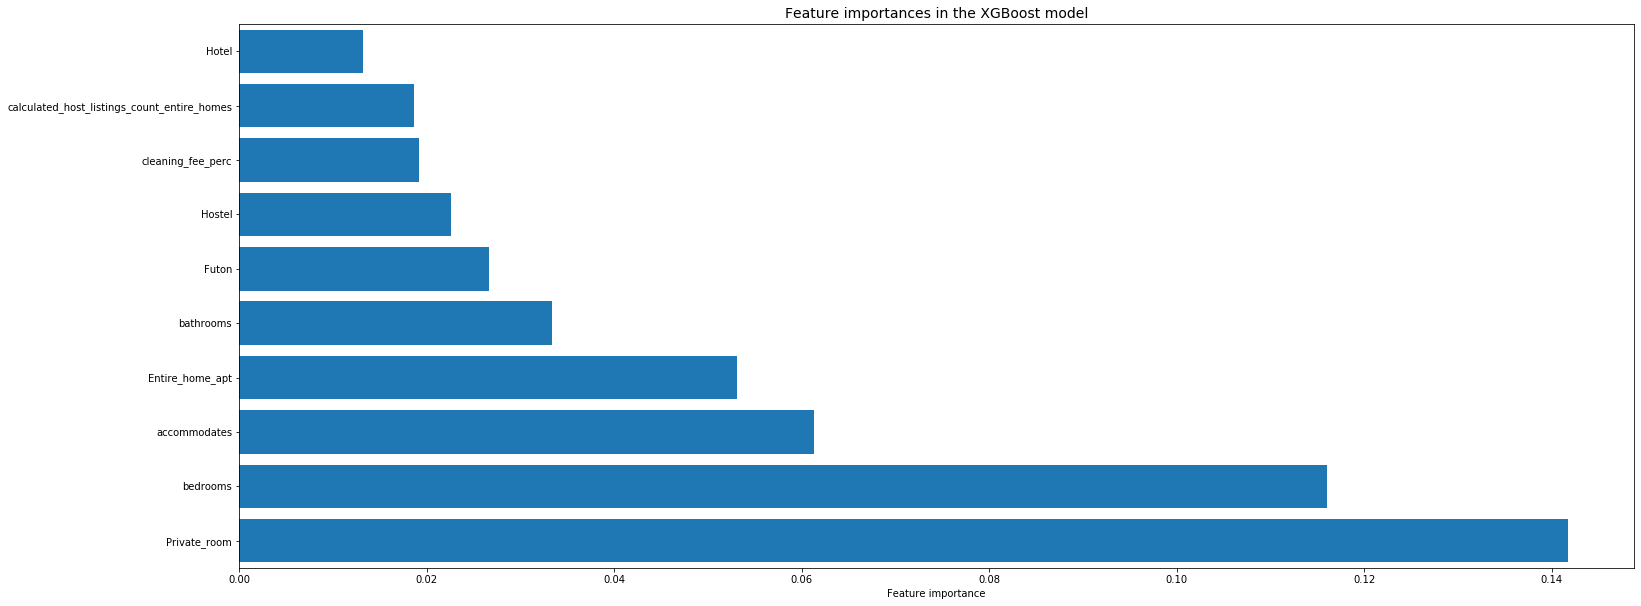

In [45]:
# Plotting feature importances
plt.figure(figsize=(25,10))
plt.barh(xgb_table.index[0:10], xgb_table.weight[0:10], align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

regr_start = time.time()

rf = RandomForestRegressor(n_estimators = 1800, min_samples_split = 2, min_samples_leaf = 1,
                                        max_features = 130, max_depth = 70)

rf.fit(X_train1, y_train1)

y_pred_train = rf.predict(X_train1)

print(f'\nTrain MSE is {(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train RMSE is {np.sqrt(mean_squared_error(y_train1, y_pred_train))}')
print(f'Train r2 is {r2_score(y_train1, y_pred_train)}')

C:\Users\susum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.



Train MSE is 0.01594107521501204
Train RMSE is 0.126257970896938
Train r2 is 0.97030852475095


In [41]:
rf_table = pd.DataFrame(rf.feature_importances_, columns=['weight'], index=X_train1.columns)
rf_table.sort_values('weight', ascending=False, inplace=True)
rf_table.head(10)

,weight
bedrooms,0.238843
accommodates,0.160273
Entire_home_apt,0.068750
bathrooms,0.060113
cleaning_fee_perc,0.056453
Private_room,0.050238
longitude,0.045783
calculated_host_listings_count_entire_homes,0.031905
latitude,0.021540
zipcode,0.020849


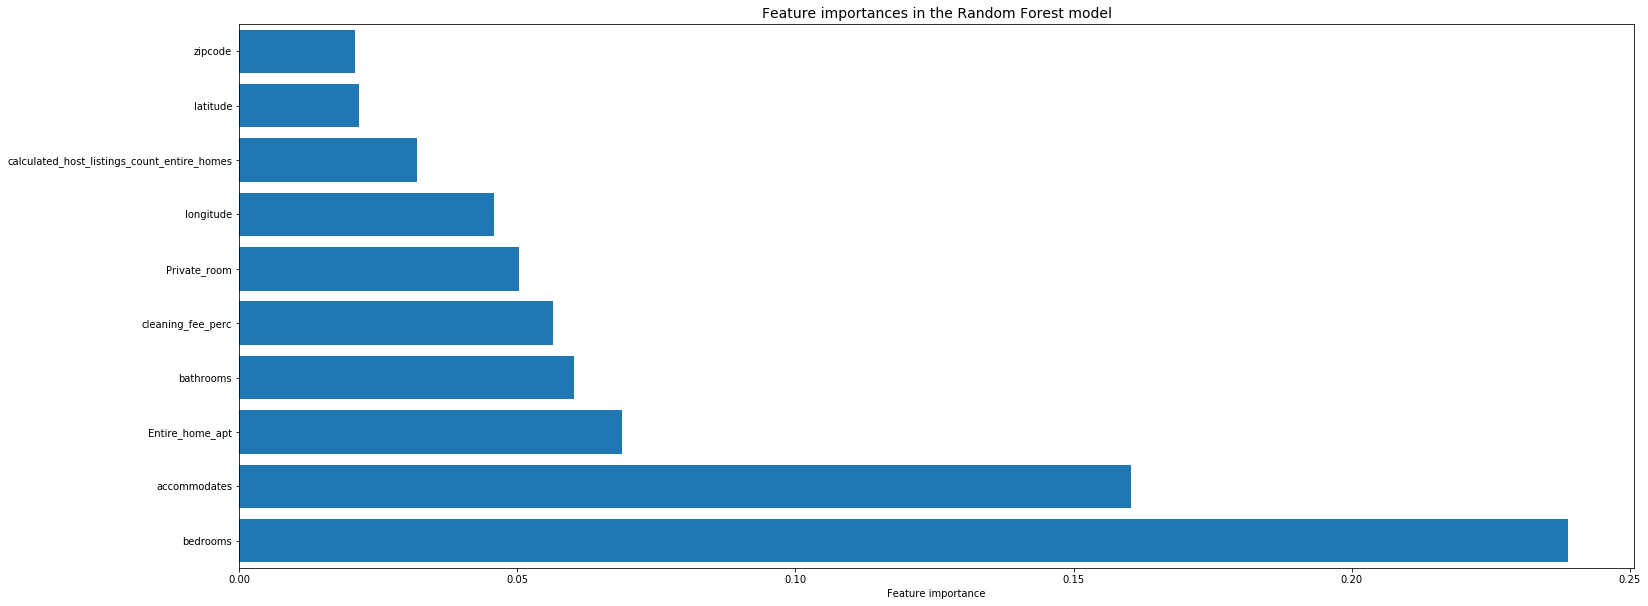

<Figure size 432x288 with 0 Axes>

In [47]:
# Plotting feature importances
plt.figure(figsize=(25,10))
plt.barh(rf_table.index[0:10], rf_table.weight[0:10], align='center') 
plt.title("Feature importances in the Random Forest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
plt.savefig('rf_features.png')